In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../../Data_Forex/EURUSD/EURUSD_H4 - EURUSD_H4.csv',
                 index_col=0,
                 parse_dates=True)

df

,Open,High,Low,Close,Volume
Time,,,,,
2007-03-05 12:00:00,1.30956,1.31145,1.30723,1.30979,185987
2007-03-05 16:00:00,1.30960,1.31112,1.30833,1.30981,1025327
2007-03-05 20:00:00,1.30979,1.30986,1.30782,1.30840,235967
2007-03-06 00:00:00,1.30813,1.31113,1.30798,1.31071,191415
2007-03-06 04:00:00,1.31078,1.31262,1.30923,1.31211,187099
...,...,...,...,...,...
2023-03-10 00:00:00,1.05855,1.05993,1.05791,1.05967,62976
2023-03-10 04:00:00,1.05967,1.06066,1.05809,1.05948,58412
2023-03-10 08:00:00,1.05946,1.06036,1.05738,1.05894,86765


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25846 entries, 2007-03-05 12:00:00 to 2023-03-10 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    25846 non-null  float64
 1   High    25846 non-null  float64
 2   Low     25846 non-null  float64
 3   Close   25846 non-null  float64
 4   Volume  25846 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


In [4]:
start_date = '2018-01-01'
end_date = '2020-01-01'

In [5]:
df = df[(df.index >= start_date) & (df.index <= end_date)]
df

,Open,High,Low,Close,Volume
Time,,,,,
2018-01-01 20:00:00,1.20102,1.20166,1.20007,1.20106,8578
2018-01-02 00:00:00,1.20105,1.20231,1.20078,1.20119,22333
2018-01-02 04:00:00,1.20118,1.20382,1.20114,1.20361,25702
2018-01-02 08:00:00,1.20362,1.20811,1.20323,1.20593,44634
2018-01-02 12:00:00,1.20592,1.20687,1.20262,1.20445,50553
...,...,...,...,...,...
2019-12-31 04:00:00,1.12034,1.12083,1.12020,1.12054,8080
2019-12-31 08:00:00,1.12057,1.12283,1.12029,1.12277,26249
2019-12-31 12:00:00,1.12277,1.12391,1.12171,1.12238,38001


Text(0, 0.5, 'Price')

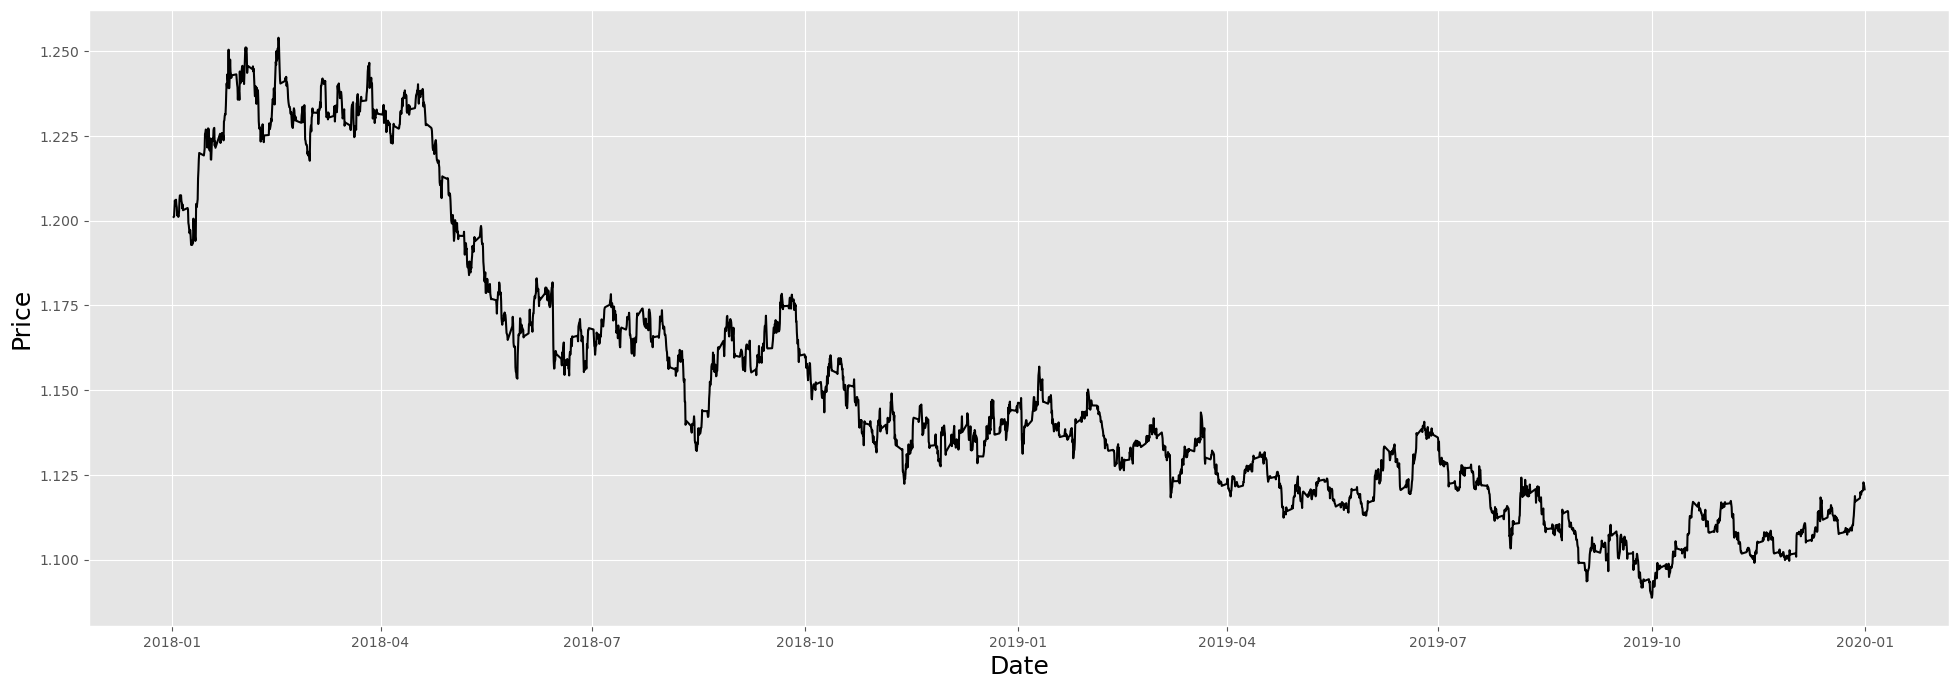

In [7]:
plt.figure(figsize=(24,8))
plt.plot(df['Close'],color = 'black')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)

In [24]:
SMA_50 = df['Close'].rolling(window=50).mean()
SMA_200 = df['Close'].rolling(window=200).mean()

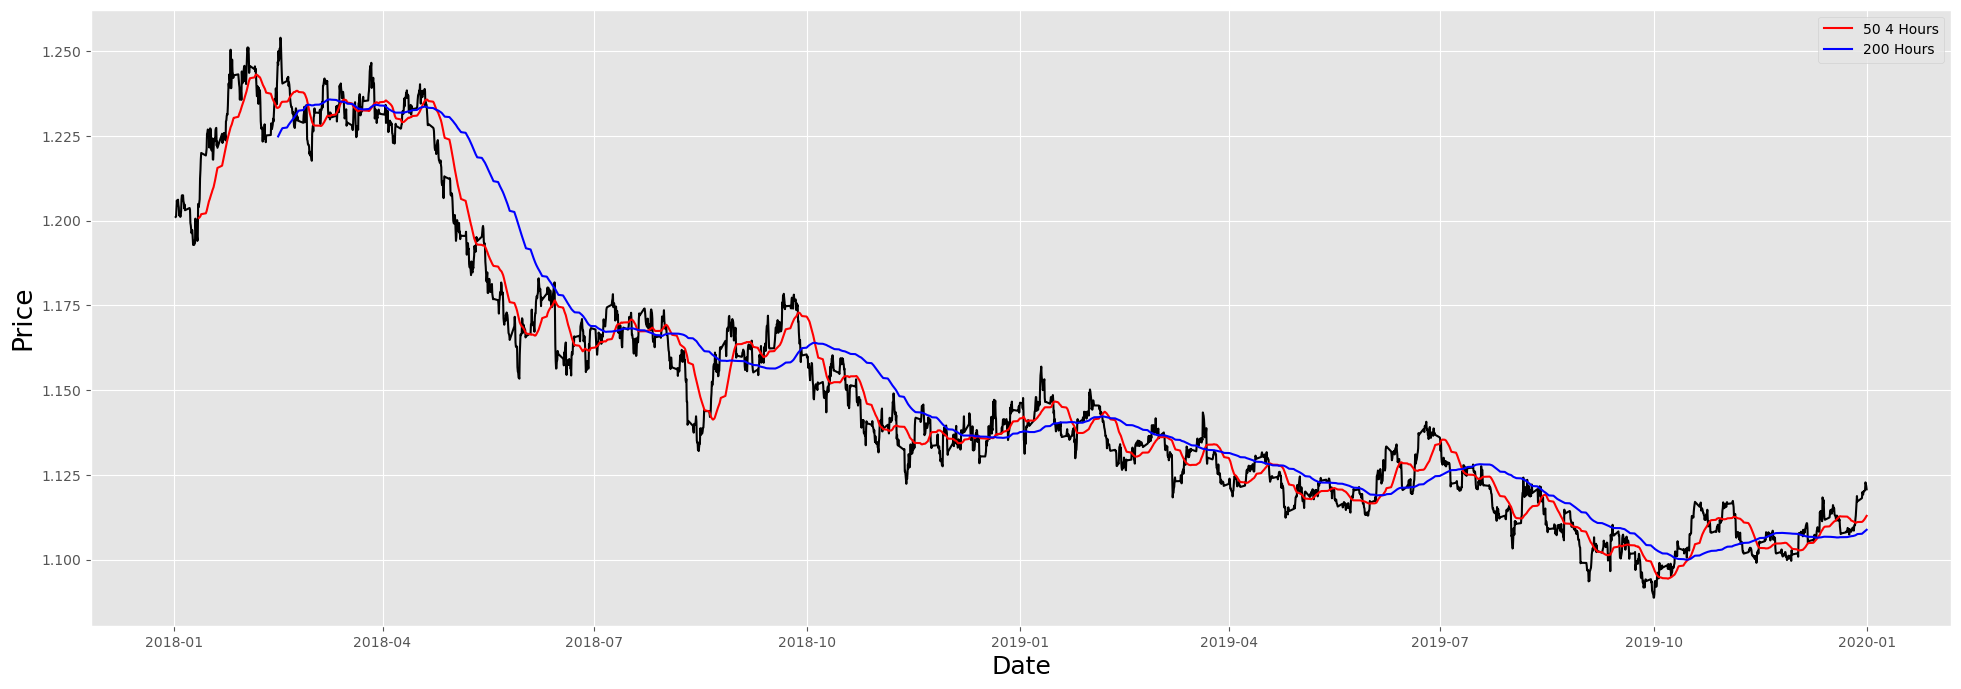

In [18]:
plt.figure(figsize=(24,8))
plt.plot(df['Close'],color='black')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=19)


plt.plot(SMA_50,label='50 4 Hours',color='red')
plt.plot(SMA_200,label='200 Hours' ,color='blue')
plt.legend()

In [15]:
EMA_50 = df['Close'].ewm(span=50).mean()
EMA_200 = df['Close'].ewm(span=200).mean()

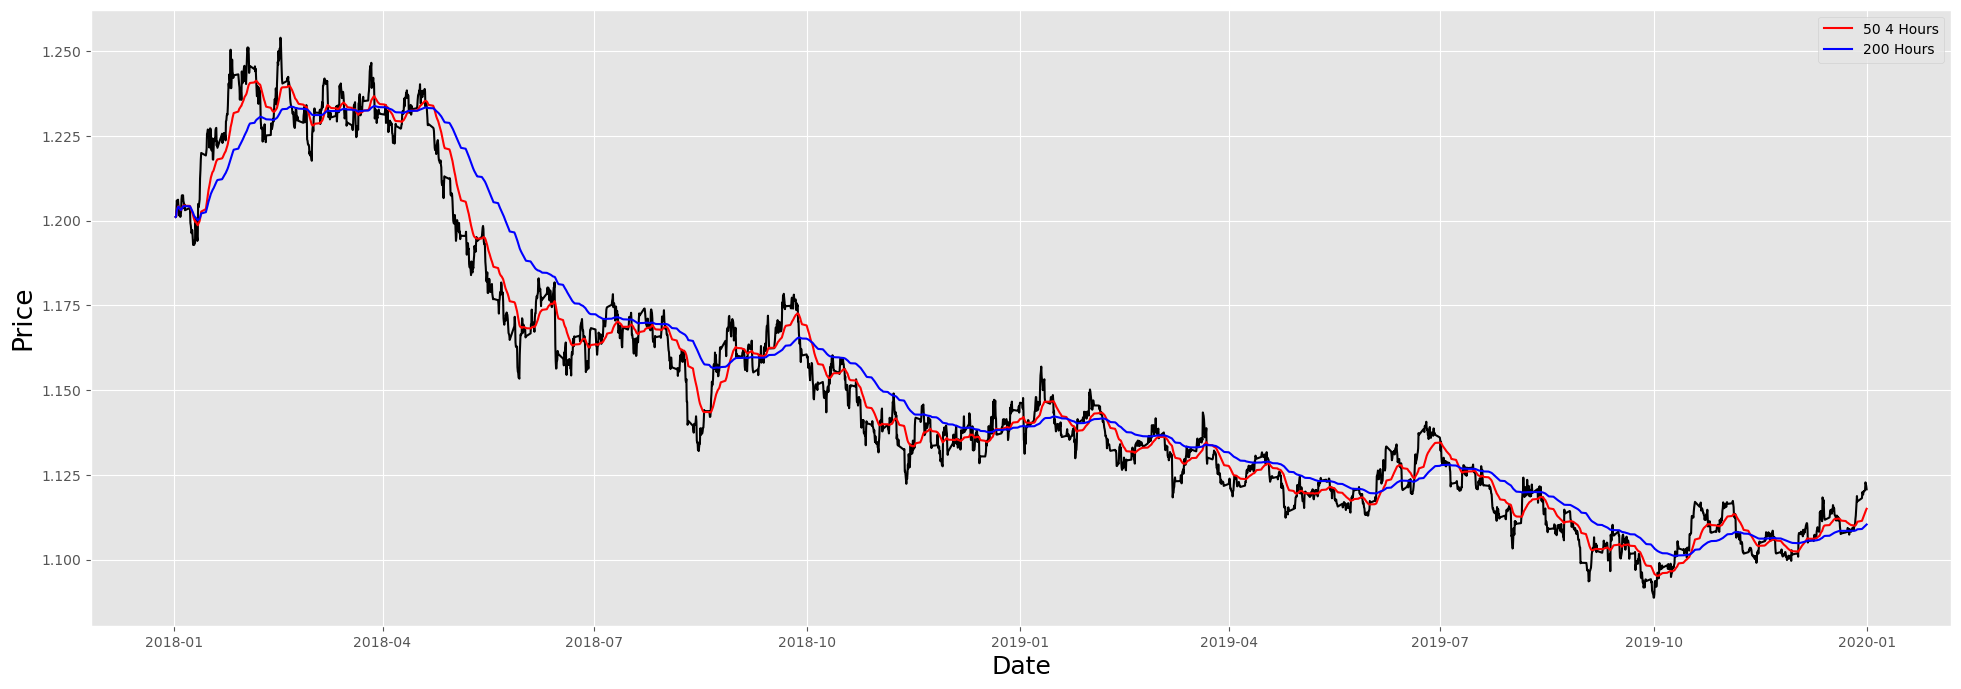

In [17]:
plt.figure(figsize=(24,8))
plt.plot(df['Close'],color='black')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=19)


plt.plot(EMA_50,label='50 4 Hours',color='red')
plt.plot(EMA_200,label='200 Hours' ,color='blue')
plt.legend()

In [29]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

C:\Users\Win10\AppData\Local\Temp\ipykernel_5640\2837771830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA_50'] = df['Close'].rolling(window=50).mean()
C:\Users\Win10\AppData\Local\Temp\ipykernel_5640\2837771830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA_200'] = df['Close'].rolling(window=200).mean()


In [30]:
crossover = ((SMA_50 <= SMA_200) & (SMA_50.shift(1) > SMA_200.shift(1)) |
             (SMA_50 >= SMA_200) & (SMA_50.shift(1) < SMA_200.shift(1)))

crossover_price = df.loc[crossover,'SMA_200']
print(crossover_price)

Time
2018-02-28 00:00:00    1.234130
2018-03-14 08:00:00    1.235044
2018-03-19 00:00:00    1.234325
2018-03-27 20:00:00    1.233810
2018-04-06 00:00:00    1.231987
2018-04-18 00:00:00    1.233387
2018-04-24 08:00:00    1.232609
2018-07-10 04:00:00    1.167398
2018-07-20 00:00:00    1.167791
2018-07-23 16:00:00    1.167396
2018-08-03 16:00:00    1.166676
2018-08-29 16:00:00    1.158689
2018-10-04 12:00:00    1.163907
2018-12-10 12:00:00    1.136597
2018-12-10 16:00:00    1.136587
2018-12-13 20:00:00    1.136349
2018-12-14 04:00:00    1.136361
2018-12-20 20:00:00    1.136120
2019-01-23 08:00:00    1.140555
2019-02-04 12:00:00    1.142151
2019-02-08 12:00:00    1.141777
2019-03-21 12:00:00    1.132609
2019-03-28 20:00:00    1.131758
2019-04-18 00:00:00    1.128186
2019-04-23 00:00:00    1.127728
2019-06-06 04:00:00    1.118954
2019-07-10 12:00:00    1.126691
2019-10-16 00:00:00    1.100019
2019-11-14 00:00:00    1.105783
2019-12-10 20:00:00    1.106473
Name: SMA_200, dtype: float64


Text(0, 0.5, 'Price')

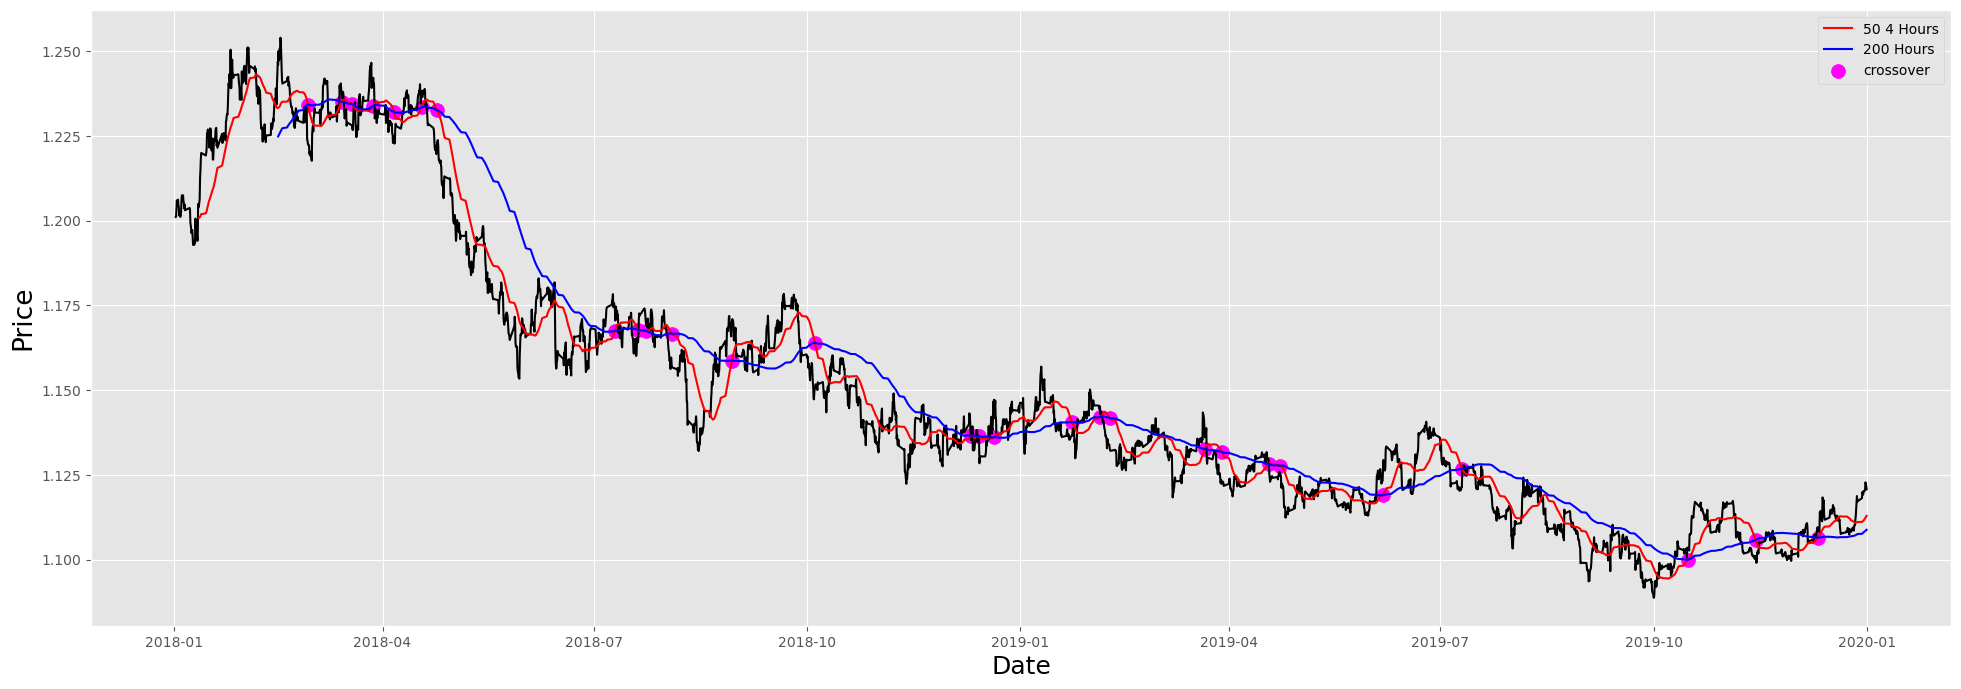

In [37]:
plt.figure(figsize=(24,8))
plt.plot(df['Close'],color='black')



plt.plot(SMA_50,label='50 4 Hours',color='red')
plt.plot(SMA_200,label='200 Hours' ,color='blue')
plt.scatter(crossover_price.index,crossover_price,label='crossover',color='magenta',s=100)
plt.legend()

plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=19)